# 贷款违约预测

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 数据加载

In [2]:
train_raw = pd.read_csv('./train.csv')
train_raw.head(10)

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
5,5,11000.0,3,7.99,344.65,A,A5,51727.0,7 years,0,...,1.0,48.0,2.0,3.0,2.0,19.0,0.0,0.0,0.0,0.0
6,6,2050.0,3,7.69,63.95,A,A4,180083.0,9 years,0,...,11.0,3.0,10.0,18.0,3.0,12.0,0.0,0.0,0.0,3.0
7,7,11500.0,3,14.98,398.54,C,C3,214017.0,1 year,1,...,16.0,10.0,5.0,21.0,4.0,8.0,0.0,0.0,0.0,2.0
8,8,12000.0,3,12.99,404.27,C,C2,188.0,5 years,2,...,7.0,2.0,13.0,17.0,11.0,15.0,NaN,0.0,0.0,6.0
9,9,6500.0,3,10.99,212.78,B,B4,54.0,NaN,1,...,21.0,24.0,6.0,39.0,5.0,7.0,0.0,0.0,0.0,8.0


In [3]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [4]:
test_raw = pd.read_csv('./testA.csv')
test_raw.head(10)

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,...,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,...,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,...,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,...,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,...,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0
5,800005,16000.0,3,5.32,481.84,A,A1,236.0,10+ years,0,...,14.0,6.0,13.0,25.0,5.0,17.0,0.0,0.0,0.0,3.0
6,800006,25000.0,5,14.99,594.62,C,C4,13.0,10+ years,1,...,6.0,6.0,10.0,17.0,7.0,14.0,0.0,0.0,0.0,1.0
7,800007,4500.0,3,7.35,139.67,A,A4,3403.0,6 years,0,...,6.0,8.0,4.0,8.0,3.0,8.0,0.0,0.0,0.0,1.0
8,800008,12000.0,5,16.55,295.34,D,D2,346.0,3 years,1,...,5.0,21.0,5.0,8.0,4.0,14.0,0.0,0.0,0.0,4.0
9,800009,16500.0,3,7.69,514.70,A,A4,8103.0,10+ years,0,...,7.0,10.0,4.0,13.0,4.0,10.0,0.0,0.0,0.0,3.0


In [5]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200000 non-null  int64  
 1   loanAmnt            200000 non-null  float64
 2   term                200000 non-null  int64  
 3   interestRate        200000 non-null  float64
 4   installment         200000 non-null  float64
 5   grade               200000 non-null  object 
 6   subGrade            200000 non-null  object 
 7   employmentTitle     200000 non-null  float64
 8   employmentLength    188258 non-null  object 
 9   homeOwnership       200000 non-null  int64  
 10  annualIncome        200000 non-null  float64
 11  verificationStatus  200000 non-null  int64  
 12  issueDate           200000 non-null  object 
 13  purpose             200000 non-null  int64  
 14  postCode            200000 non-null  float64
 15  regionCode          200000 non-nul

In [7]:
# 无用列
useless_col = 'id'

# 训练集特征与标签分离
labels = train_raw['isDefault']

# 时间特征列
date_col = ['issueDate', 'earliesCreditLine']

# 匿名特征
anonymous_col = ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8','n9', 'n10', 'n11', 'n12', 'n13', 'n14']

# 离散型变量特征
cat_col = [
    'grade', 'subGrade', 'employmentTitle', 'homeOwnership', 'verificationStatus', 'purpose', 
    'postCode', 'regionCode', 'initialListStatus', 'applicationType', 'title', 'policyCode', 
    'employmentLength', 'term', 
]

# 连续型变量特征
num_col = [
    'loanAmnt', 'interestRate', 'installment', 'annualIncome',  'dti',  
    'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
    'pubRecBankruptcies', 'revolBal', 'revolUtil',  'totalAcc',
]

# 数据探索与清洗

## 合法性

In [8]:
# 重复值
print('train', train_raw.duplicated().sum())
print('test ', test_raw.duplicated().sum())

train 0
test  0


In [9]:
# 缺失值
train_null = train_raw.isnull().sum()
train_null = pd.DataFrame(train_null[train_null != 0] / len(train_raw), columns=['train'])

test_null = test_raw.isnull().sum()
test_null = pd.DataFrame(test_null[test_null != 0] / len(test_raw), columns=['test'])

pd.merge(train_null, test_null, how='outer', left_index=True, right_index=True)

,train,test
dti,0.000299,0.000305
employmentLength,0.058499,0.058710
employmentTitle,0.000001,NaN
n0,0.050338,0.050555
n1,0.050338,0.050555
n10,0.041549,0.041970
n11,0.087190,0.087875
n12,0.050338,0.050555
n13,0.050338,0.050555
n14,0.050338,0.050555


In [10]:
# 非法值
print('train', train_raw.select_dtypes('object').columns.tolist())
print('test ', test_raw.select_dtypes('object').columns.tolist())

train ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']
test  ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']


## 数据清洗

In [11]:
# 缺失值填充
fill_mean_col = [
    'dti', 'n0', 'n1', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
    'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'revolUtil'
]

for i in fill_mean_col:
    train_raw[i].fillna(value=train_raw[i].mean(), inplace=True)
    test_raw[i].fillna(value=train_raw[i].mean(), inplace=True)

fill_mode_col = ['employmentTitle', 'employmentLength', 'postCode', 'pubRecBankruptcies', 'title']

for i in fill_mode_col:
    train_raw[i].fillna(value=train_raw[i].mode()[0], inplace=True)
    test_raw[i].fillna(value=train_raw[i].mode()[0], inplace=True)

In [72]:
# 训练集测试集数据整合处理
train_raw['train'] = True
test_raw['train'] = False
data_set = pd.concat([train_raw, test_raw], axis=0)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     1000000 non-null  float64
 8   employmentLength    1000000 non-null  object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  purpose             1000000 non-null  int64  
 14  postCode            1000000 non-null  float64
 15  regionCode      

In [73]:
# 'grade', 'subGrade', 'employmentLength', 自然编码处理
for col in 'grade', 'subGrade', 'employmentLength':
    data_set[col] = pd.factorize(data_set[col])[0]
data_set.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,train
0,0,35000.0,5,19.52,917.97,0,0,320.0,0,2,...,8.000000,4.000000,12.000000,2.000000,7.0,0.000000,0.000000,0.000000,2.000000,True
1,1,18000.0,5,18.49,461.90,1,1,219843.0,1,0,...,8.575994,8.282953,14.622488,5.592345,13.0,0.000815,0.003384,0.089366,2.178606,True
2,2,12000.0,5,16.99,298.17,1,2,31698.0,2,0,...,21.000000,4.000000,5.000000,3.000000,11.0,0.000000,0.000000,0.000000,4.000000,True
3,3,11000.0,3,7.26,340.96,2,3,46854.0,3,1,...,4.000000,7.000000,21.000000,6.000000,9.0,0.000000,0.000000,0.000000,1.000000,True
4,4,3000.0,3,12.99,101.07,3,4,54.0,3,1,...,9.000000,10.000000,15.000000,7.000000,12.0,0.000000,0.000000,0.000000,4.000000,True


In [74]:
# 'issueDate', 时间格式处理
data_set['issueDate'] = pd.to_datetime(data_set['issueDate'])

In [75]:
# 'earliesCreditLine' 时间格式处理
def string_to_month(x):
    string_to_month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    num = string_to_month[x.split('-')[0]]
    return str(num) + '-' + x.split('-')[1]

data_set['earliesCreditLine'] = data_set['earliesCreditLine'].apply(string_to_month)
data_set['earliesCreditLine'] = pd.to_datetime(data_set['earliesCreditLine'])

In [76]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1000000 non-null  int64         
 1   loanAmnt            1000000 non-null  float64       
 2   term                1000000 non-null  int64         
 3   interestRate        1000000 non-null  float64       
 4   installment         1000000 non-null  float64       
 5   grade               1000000 non-null  int64         
 6   subGrade            1000000 non-null  int64         
 7   employmentTitle     1000000 non-null  float64       
 8   employmentLength    1000000 non-null  int64         
 9   homeOwnership       1000000 non-null  int64         
 10  annualIncome        1000000 non-null  float64       
 11  verificationStatus  1000000 non-null  int64         
 12  issueDate           1000000 non-null  datetime64[ns]
 13  purpose      

## 数据分布情况

In [14]:
from sklearn.preprocessing import MinMaxScaler

# 最大最小归一化后画箱线图
def plot_box(df, col):
    temp_df = pd.DataFrame(MinMaxScaler().fit_transform(df[col]), columns=col)
    temp_df.plot(kind='box', figsize=(15, 5))
    plt.show()

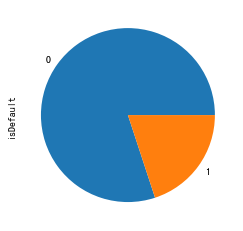

In [15]:
# 标签分布
labels.value_counts().plot(kind='pie')
plt.show()

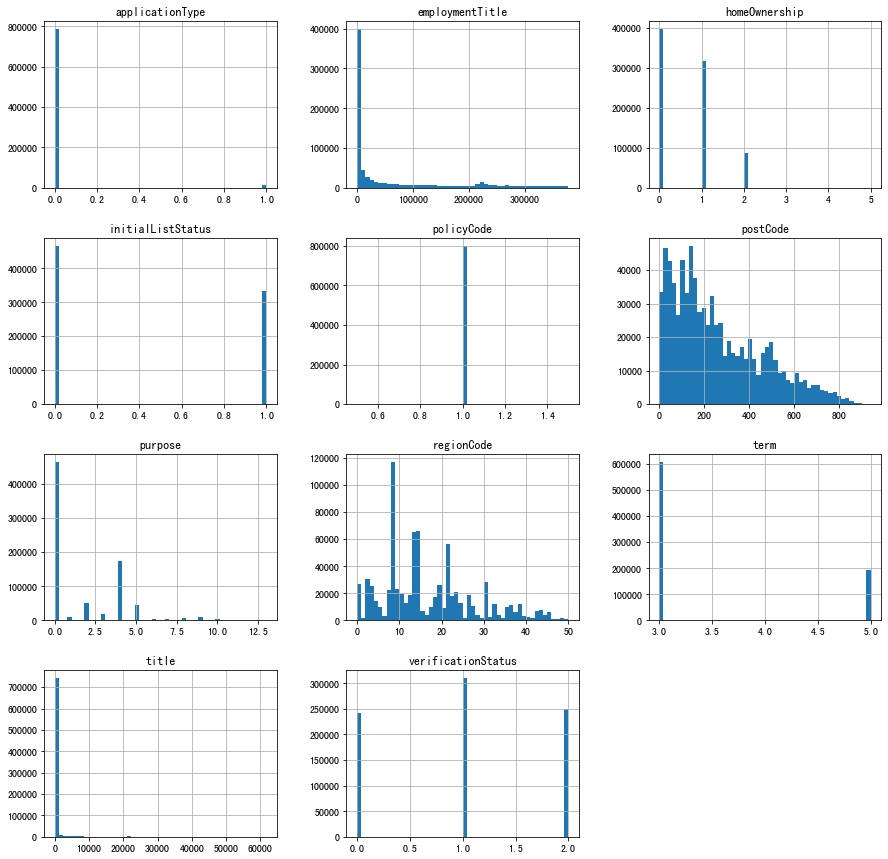

In [16]:
# 离散特征分布
train_raw[cat_col].hist(bins=50, figsize=(15, 15))
plt.show()

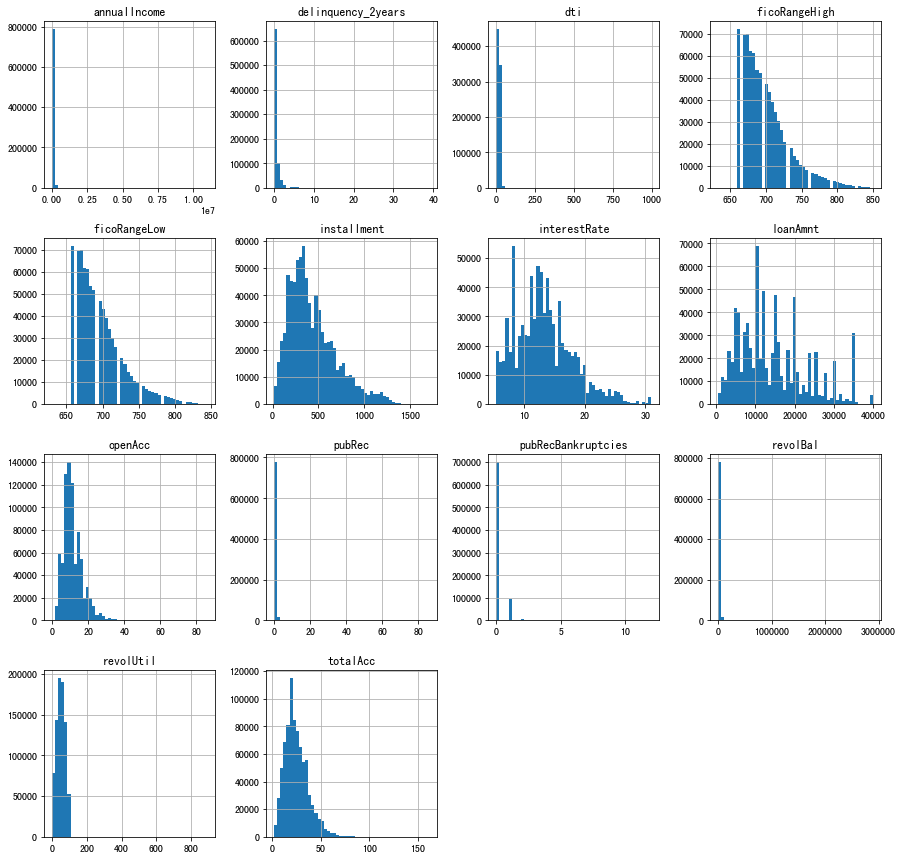

In [17]:
# 连续特征分布
train_raw[num_col].hist(bins=50, figsize=(15, 15))
plt.show()

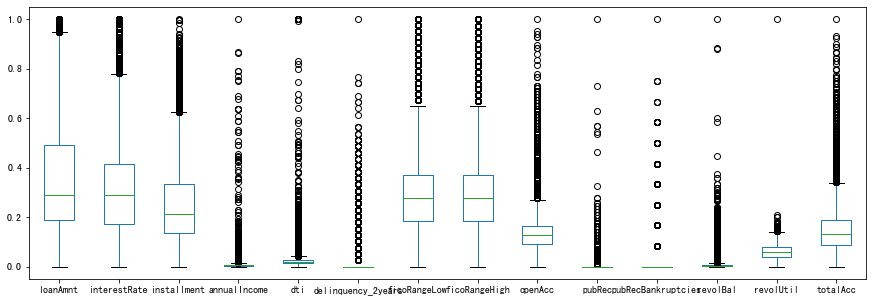

In [18]:
plot_box(train_raw, num_col)

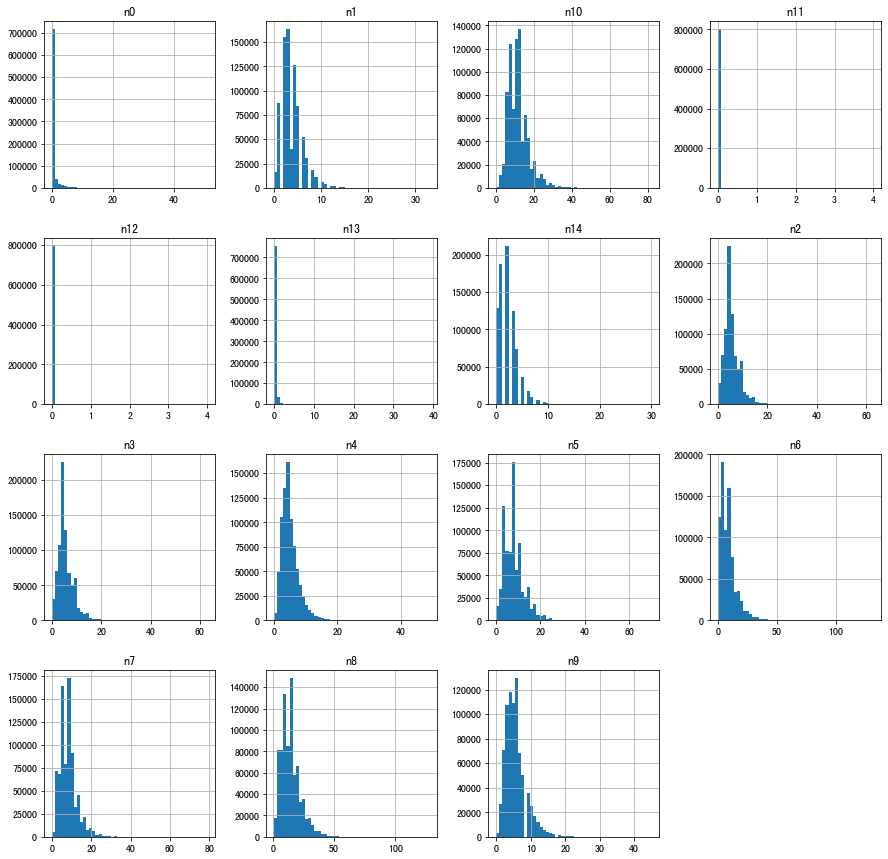

In [19]:
# 匿名特征分布
train_raw[anonymous_col].hist(bins=50, figsize=(15, 15))
plt.show()

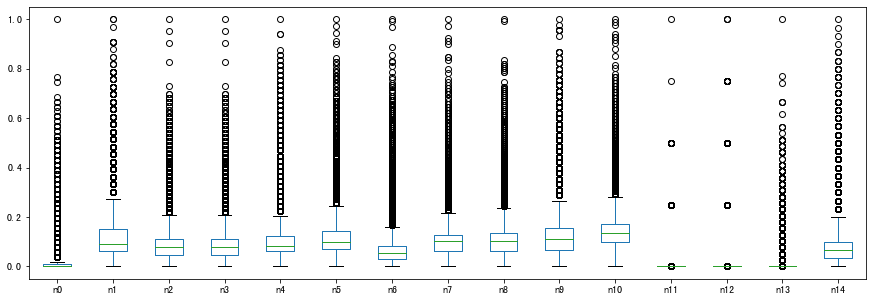

In [20]:
plot_box(train_raw, anonymous_col)

## 变量 IV 值查看

In [22]:
def get_woe_and_iv(df, labels, col, strategy='distance', bins=None):

    # 数据分桶
    df = df[[col]+[labels]]

    if strategy == 'distance':
        df['bins'] = pd.cut(df[col], bins=bins)
    elif strategy == 'frequency':
        df['bins'] = pd.qcut(df[col], q=bins, duplicates='drop')

    woe_detail = df['bins'].value_counts().reset_index().rename(columns={'bins': 'total', 'index': 'bins'})
    
    # 计算每个属性 good(not event) 和 bad(event) 的个数
    temp = df.groupby('bins')[labels].value_counts().unstack().reset_index().rename(columns={0: 'good_total', 1: 'bad_total'})
    woe_detail = pd.merge(woe_detail, temp, on='bins', how='left')
    woe_detail.fillna(value={'good_total': 0, 'bad_total': 0}, inplace=True)
    
    # 计算每个属性 good 和 bad 的占比
    woe_detail['good_ratio'] = woe_detail['good_total'] / woe_detail['good_total'].sum()
    woe_detail['bad_ratio'] = woe_detail['bad_total'] / woe_detail['bad_total'].sum()
    
    # 计算 woe 值
    woe_detail['woe'] = np.log1p(woe_detail['bad_ratio'] / woe_detail['good_ratio'])
    woe_detail.sort_values('woe', inplace=True, ascending=False)
    
    # 计算 Odds 值
    c = woe_detail['bad_total'].sum() / woe_detail['good_total'].sum()
    woe_detail['odds'] = np.log1p(c) + woe_detail['woe']
    
    # 单调性检验
    woe_detail['Monotonicity'] = woe_detail['odds'].diff().apply(lambda x: True if x <= 0.0 else False)
    
    # 计算 IV 值
    iv_score = ((woe_detail['bad_ratio'] - woe_detail['good_ratio']) * woe_detail['woe']).sum()
    
    return woe_detail, iv_score

In [195]:
data_dict = {   
    'loanAmnt': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'term': {
        'strategy': 'distance', 
        'bins': [0, 3, 5]
    },
    'interestRate': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'installment': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'grade': {
        'strategy': 'distance', 
        'bins': [-float('inf'),0,1,2,3,4,5,6]
    },
    'subGrade': {
        'strategy': 'distance', 
        'bins': [-float('inf')]+[x for x in range(35)]
    },
    'employmentLength': {
        'strategy': 'distance', 
        'bins': [-float('inf'),0,1,2,3,4,5,6,7,8,9,10]
    },
    'homeOwnership': {
        'strategy': 'distance', 
        'bins': [-float('inf'),0,1,2,3,4,5]
    },
    'annualIncome': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'verificationStatus': {
        'strategy': 'distance', 
        'bins': [-float('inf'),0,1,2]
    },
    'purpose': {
        'strategy': 'distance', 
        'bins': [x for x in range(-1, 14, 1)]
    },
    'dti': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'delinquency_2years': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'ficoRangeLow': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'ficoRangeHigh': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'openAcc': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'pubRec': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'pubRecBankruptcies': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'revolBal': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'revolUtil': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'totalAcc': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'initialListStatus': {
        'strategy': 'distance', 
        'bins': [-1, 0, 1]
    },
    'applicationType': {
        'strategy': 'distance', 
        'bins': [-1, 0, 1]
    },
    'policyCode': {
        'strategy': 'distance', 
        'bins': [0,1]
    },
    'n0': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n1': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n2': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n3': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n4': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n5': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n6': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n7': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n8': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n9': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n10': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n11': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n12': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n13': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },
    'n14': {
        'strategy': 'frequency', 
        'bins': [0, 0.2, 0.4, 0.6, 0.8, 1]
    },

}

In [196]:
df_data = data_set[data_set['train']==True]
df_data['isDefault'] = labels 
df_record = {}
df_iv = {'columns':[], 'iv': []}
for (key, value) in data_dict.items():
    df_woe, iv = get_woe_and_iv(df_data, 'isDefault' ,key , strategy=value['strategy'], bins=value['bins'])
    df_iv['columns'].append(key)
    df_iv['iv'].append(iv)
    df_record[key] = df_woe
pd.DataFrame(df_iv).sort_values('iv', ascending=False)

,columns,iv
5,subGrade,0.227620
4,grade,0.216978
2,interestRate,0.195231
1,term,0.094424
14,ficoRangeHigh,0.053424
13,ficoRangeLow,0.053424
11,dti,0.034611
9,verificationStatus,0.026087
38,n14,0.019562
0,loanAmnt,0.016376


# 特征工程

In [448]:
# 复制一份
df_features = data_set.copy()

In [449]:
# 就业年限与年收入
df_features['mean_income'] = df_features['annualIncome'] / (df_features['employmentLength'] + 1)

# 平均每年贷款金额与年收入
df_features['mean_loanAmnt_ration'] = df_features['loanAmnt'] / df_features['term'] / (df_features['annualIncome']+1)

In [450]:
# 最早开立月份与贷款时间之差
df_features['new_date'] = df_features['issueDate'] - df_features['earliesCreditLine']
df_features['new_date'] = df_features['new_date'].apply(lambda x: x.days)

In [451]:
# one-hot编码
df_features = pd.get_dummies(df_features, columns=[
    'grade', 'subGrade', 'purpose', 'verificationStatus','initialListStatus', 'applicationType', 'term'])

In [452]:
# 地区平均年收入
temp = train = df_features[df_features['train'] == True]

temp = train.groupby('regionCode')['annualIncome'].agg('mean').reset_index().rename(columns={'annualIncome': 'region_annualIncome'})
df_features = pd.merge(df_features, temp, on='regionCode')

In [453]:
# 删除无用列
drop_list = ['issueDate', 'earliesCreditLine', 'employmentTitle', 'regionCode', 'postCode'
             , 'title', 'policyCode', 'id']
df_features.drop(drop_list, axis=1, inplace=True)

In [454]:
# 数据拆分
train = df_features[df_features['train'] == True]
test = df_features[df_features['train'] == False]

train.drop('train', axis=1, inplace=True)
test.drop('train', axis=1, inplace=True)

In [456]:
df_features.columns.tolist()

['loanAmnt',
 'interestRate',
 'installment',
 'employmentLength',
 'homeOwnership',
 'annualIncome',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'train',
 'mean_income',
 'mean_loanAmnt_ration',
 'new_date',
 'grade_0',
 'grade_1',
 'grade_2',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'subGrade_0',
 'subGrade_1',
 'subGrade_2',
 'subGrade_3',
 'subGrade_4',
 'subGrade_5',
 'subGrade_6',
 'subGrade_7',
 'subGrade_8',
 'subGrade_9',
 'subGrade_10',
 'subGrade_11',
 'subGrade_12',
 'subGrade_13',
 'subGrade_14',
 'subGrade_15',
 'subGrade_16',
 'subGrade_17',
 'subGrade_18',
 'subGrade_19',
 'subGrade_20',
 'subGrade_21',
 'subGrade_22',
 'subGrade_23',
 'subGrade_24',
 'subGrade_25',
 'subGrade_26',
 'subGrade_27',
 'subGrade_28',
 'subGrade_29',
 'subGrade_30',
 '

# 数据标准化

In [457]:
from sklearn.preprocessing import StandardScaler

In [458]:
ss = StandardScaler()

train = ss.fit_transform(train)
test = ss.transform(test)

# 训练集验证集拆分

In [459]:
from sklearn.model_selection import train_test_split

In [460]:
train_x, val_x, train_y, val_y = train_test_split(train, labels, test_size=0.2, random_state=529)

print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('val_x', val_x.shape)
print('val_y', val_y.shape)

train_x (640000, 100)
train_y (640000,)
val_x (160000, 100)
val_y (160000,)


# 模型训练

In [461]:
from sklearn.linear_model import LogisticRegression

In [462]:
lr = LogisticRegression()
lr.fit(train_x, train_y)
lr_pro = lr.predict_proba(val_x)
lr_predict = lr.predict(val_x)

In [463]:
# lr_sub = LogisticRegression()
# lr_sub.fit(train, labels)
# sub_proba = lr_sub.predict_proba(test)

In [474]:
from lightgbm import LGBMClassifier

In [476]:
lgb = LGBMClassifier()
lgb.fit(train_x, train_y)
lgb_pro = lgb.predict_proba(val_x)
lgb_predict = lgb.predict(val_x)

In [483]:
lgb_sub = LGBMClassifier()
lgb_sub.fit(train, labels)
sub_proba = lgb_sub.predict_proba(test)

# 模型评估

## 学习曲线

In [464]:
from sklearn.model_selection import learning_curve

In [465]:
def plot_learn_curve(estimator, x, y):
    
    train_sizes_abs, train_scores, test_scores = learning_curve(
        estimator=estimator, X=x, y=y, cv=3,
        train_sizes=np.array([0.1, 0.33, 0.55, 0.78, 1. ]), 
        scoring='roc_auc'
    )
    
    plt.plot(train_scores.mean(axis=1), label='train')
    plt.plot(test_scores.mean(axis=1), label='test')
    plt.axhline(y=1,c="r")
    plt.xticks(ticks=[x for x in range(5)], labels=train_sizes_abs)
    plt.legend()
    plt.grid()
    plt.show()

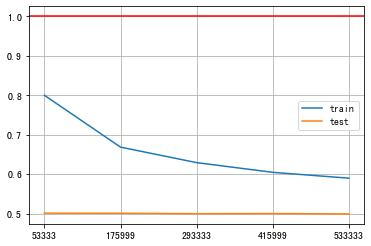

In [480]:
plot_learn_curve(lgb, train, labels)

## 准确召回

In [467]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [468]:
def print_score(y_true, y_pre):
    print('acc', accuracy_score(y_true, y_pre))
    print('pre', precision_score(y_true, y_pre))
    print('rec', recall_score(y_true, y_pre))

In [481]:
print_score(val_y, lgb_predict)

acc 0.8009125
pre 0.0
rec 0.0


## AUC

In [470]:
from sklearn.metrics import roc_curve, auc

In [471]:
def plot_auc(y_score, test_labels):
    fpr, tpr, thresholds = roc_curve(test_labels, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
    roc_auc = auc(fpr, tpr)

    # 绘制面积图
    plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
    # 添加边际线
    plt.plot(fpr, tpr, color='black', lw = 1)
    # 添加对角线
    plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
    # 添加文本信息
    plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
    # 添加x轴与y轴标签
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    # 显示图形
    plt.show()

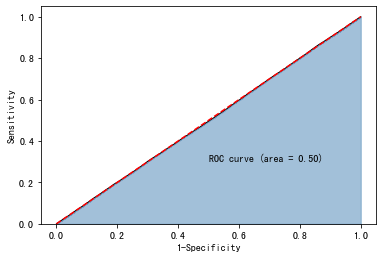

In [482]:
plot_auc(lgb_pro[:,1], val_y)

# 结果上传

In [484]:
sub = pd.read_csv('./sample_submit.csv')
sub['isDefault'] = sub_proba[:, 1]
sub.to_csv('./baseline.csv', index=False)